<a href="https://colab.research.google.com/github/hank199599/data_science_from_scratch_reading_log/blob/main/Chapter18.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 人工神經網路(artificial neural network)
一種受人類大腦啟發的預測模型

# 感知器(perceptron)
最單純的一種神經網路  
它由一個可接受n個二元輸入的單一神經元所組成。  
它會計算輸入值的加權總合，如果加權總合大於或等於零。會做出進一步反應。

In [ ]:
from typing import List

Vector = List[float]

def dot(v:Vector,w:Vector)->float:
  #計算v_1*w_1+... +v_n*w_n
  assert len(v)==len(w),"兩個向量必須有相同的維度"

  return sum(v_i*w_i for v_i,w_i in zip(v,w))

In [ ]:
def step_function(x:float)->float:
  return 1.0 if x >=0 else 0.0

def perceptron_output(weights:Vector,bias:float,x:Vector)->float:
  """如果感知器要做出進一步反映，就送回1：否則送回0"""
  calculation = dot(weights,x)+bias
  return step_function(calculation)

運作原理：  
利用超平面(hyperplane)，把點x切分到兩個半空間(half-spaces)之中。

```
dot(weights,x)+bias = 0
```


### 圖 18-1 兩輸入感知器的決策空間

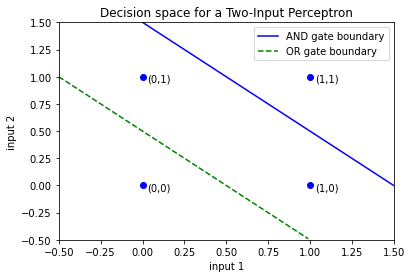

In [ ]:
from matplotlib import pyplot as plt

xs1 = [num/100 for num in range(0,151,1)]
ys1 = [(-1)*num+(3/2) for num in xs1]

xs2 = [num/100 for num in range(-50,100,1)]
ys2 = [(-1)*num+(1/2) for num in xs2]


plt.plot(xs1,ys1,'b-',label="AND gate boundary")
plt.plot(xs2,ys2,'g--',label="OR gate boundary")

point_x=[0,0,1,1]
point_y=[0,1,0,1]

for point_x_i,point_y_i in zip(point_x,point_y):
  plt.scatter(point_x_i,point_y_i,c='b')
  label="("+str(point_x_i)+","+str(point_y_i)+")"
  plt.annotate(label,xy=(point_x_i,point_y_i),xytext=(5,-5),textcoords='offset points')



plt.legend(loc=1)
plt.axis([-0.5,1.5,-0.5,1.5])
plt.title("Decision space for a Two-Input Perceptron")
plt.xlabel("input 1")
plt.ylabel("input 2")
plt.show()

只要適當選擇權重值，它就能用來解決一些簡單問題。

## 建立一個AND閘

In [ ]:
and_weights=[2.,2]
and_bias=-3.

assert perceptron_output(and_weights,and_bias,[1,1]) == 1
assert perceptron_output(and_weights,and_bias,[0,1]) == 0
assert perceptron_output(and_weights,and_bias,[1,0]) == 0
assert perceptron_output(and_weights,and_bias,[0,0]) == 0

## 建立一個OR閘

In [ ]:
and_weights=[2.,2]
and_bias=-1.

assert perceptron_output(and_weights,and_bias,[1,1]) == 1
assert perceptron_output(and_weights,and_bias,[0,1]) == 1
assert perceptron_output(and_weights,and_bias,[1,0]) == 1
assert perceptron_output(and_weights,and_bias,[0,0]) == 0

## 建立一個NOT閘

In [ ]:
and_weights=[-2.]
and_bias= 1.

assert perceptron_output(and_weights,and_bias,[0]) == 1
assert perceptron_output(and_weights,and_bias,[1]) == 0

## 建立一個XOR閘
然而有些問題無法透過單一感知器來解決，此時我們就需要一個較為複雜的神經網路。


```python
and_gate = min
or_gate = max
xor_gate = lambda x,y:0 if x==y else 1
```



# 正向饋送神經網路
大腦的拓撲結構極其複雜,因此我們經常用理想的**正向饋送(feed-forward)神經**做為其近似結構,結構包含好幾層離散的神經元,每個神經元都與下一層相連。這種構通常都有一個輸入層(負責接受輸入,並把輸入往後饋送,而不作任何變動),一 多個「隱藏層」(每一層都包含多個神經元,負責接受上一層的輸出,然後執行運算 把結果送至下一層),還有一個輸出層(負責送出最後的輸出)。

和感知器一樣的是,每個(非輸入)神經元都會針對送進來的每個輸入,設定相應的有與偏差。為了讓表達方式單純一點,我們把偏差項(bias)添加到權重向量(weights vectors)
的最後面,然後在每個神經元輸入最後面也添加一個偏差項,並設定其值為1。 就像感知器的做法一樣,每個神經元都會把輸入與權重相乘之後加總起來。但此處、 不是把乘積之和直接套入階梯函數 Step_function 以做為輸出,而是改用另一種近似 函數但比較平滑的函數。具體來說,我們用的就是所謂的S型(sigmoid)函數。

In [ ]:
import math
def sigmoid(t:float)->float:
  return 1/(1+math.exp(-t))

### 圖 18-2 S型函數

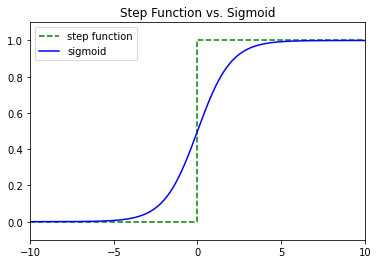

In [ ]:
import math
from matplotlib import pyplot as plt
import numpy as np 
  
xs = [num/1000 for num in range(-10000,10000)]
ys1 = [1/(1+math.exp(-num)) for num in xs]

x = np.array([-10, 0, 10]) 
y = np.array([0,0,1]) 

plt.title("Step Function vs. Sigmoid")
plt.step(x, y, 'g--',label="step function") 
plt.plot(xs,ys1,'b-',label="sigmoid")
plt.legend(loc=2)
plt.axis([-10,10,-0.1,1.1])
plt.xticks([num*5 for num in range(-2,3)])
plt.show()

在訓練神經網路時，運算過程中需要使用**微積分**來尋找最佳解。  
因此需要使用平滑函數，而sigmoid函數是一個相當好的平滑函數。

計算輸出如下：

In [ ]:
def neuron_output(weights:Vector,inputs:Vector) ->float:
  # bias 偏差項已包含在weights之中，inputs也有偏差項的相應元素，其值為1
  return sigmoid(dot(weights,inputs))

透過這個函數，我們能把神經元表示為一個**權重向量**。  
其元素的數量會比神經元的輸入多出1(因為多了一個偏差項)

In [77]:
from typing import List

def feed_forward(neural_network:List[List[Vector]],input_vector:Vector)->List[Vector]:
  """
  把輸入向量送進神經網路
  送回所有層(非只有一層)的輸出
  """
  outputs:List[Vector]=[]

  for layer in neural_network:
    input_with_bias = input_vector +[1] #每個向量都加入值為1的偏差項
    output = [neuron_output(neuron,input_with_bias) for neuron in layer]

    outputs.append(output)

    #這一層的輸出即為下一層的輸入
    input_vector = output
  
  return outputs

透過神經網路製作XOR閘

In [78]:
xor_network=[
      #隱藏層
      [[20.,20,-30],  #「AND」神經元
       [20.,20,-10]], #「OR」神經元
      # 輸出層
      [[-60.,60,-30]] #「第二輸入AND NOT 第一輸入」神經元
      ]

# feed_forward 會送回所有層的輸出，所以[-1]代表最後一層的輸出
# 而[0]則可取得結果向量的數值輸出

assert 0.000 < feed_forward(xor_network,[0,0])[-1][0] < 0.001
assert 0.999 < feed_forward(xor_network,[1,0])[-1][0] < 1.000
assert 0.999 < feed_forward(xor_network,[0,1])[-1][0] < 1.000
assert 0.000 < feed_forward(xor_network,[1,1])[-1][0] < 0.001

只要給定輸入(包含兩個元素值的二維向量),隱藏層就會計算出另一個二維向量,這個 向量就是兩個輸入元素值分別進行「AND」運算與「OR」運算的計算結果。

輸出層接收了這個二維向量之後,就會進一步計算「第二個元素值 AND NOT 第一個元素 值」的結果。最後這個網路就會得出「OR AND NOT AND」的結果,也就是 XOR 的效果。

### 圖 18-3 XOR的神經網路
![](https://lh3.googleusercontent.com/WZXaCtljiYMdGMLjNyxx1EnoapqqDzzjNQXVq1fIfO1DA635j27lJBjMVpbtfZMRSDtcWgSovsZlKRnhcfjzgsE6XoyPpE6UtWpReTGMwXWGy-oFVVZ8Ut6drILbvuMhGby_nzNm6OfbSc0cAjkXK3suYCBZ9vr2RvNAnhK_T1lYJaIepG7AiltJiYvKnJ7iNIa7P3zJ8-Ywqr00sfiHB-cBgdxFZvsziYGEL6Ka9exPqqAGIUkkWZfKU1qMHTaUI5uYwCLNK4TFDvY-_Chm8MobI7z8UHl-q8QS4NBMuM9rN0MMSEcrNOXxAnHkcHxkUOU2Gl5PzADbzCxDgWBDlxKM_5f0jZ4RBry4-F30s_m3xf2h0-Tlo8-lkIoa2rWIhG0eVcjMc_NYM4UNi17nboA1915DbSLNwyWC1b1y90et-ec0EydqaWjQIYyplk3crJGBq56HmOe_82cuRiy9TCHRm0Zkw20xyTp7je-7MrxjNGxadR2ItA1ZdMBBjc2Cvce3f8rnjcPMUNiUGZe_xtMpRHsMZWq21w9_z9vS3fo3d8KTciJShEiJS8KrxPOuKbKMWgbOuhrhFDWFVBGnIxveUpf0c5GD7hlOxIA1aZsdkaKPmZIJW7VarGbYjz4ctyn7YXBin8JBY1Tjhwkz6OerAlCTwVXnB7TQHJ6A69XttIRAbWgM0AySGxU-Lg=w714-h333-no?authuser=0)

# 反向傳播 (backpropa)

# 範例：Fizz Buzz

# 進一步：用Tensorflow
[參見作者的部落格文章](https://jeolgrus.com/2016/05/23/fizz_buzz-in-tensorflow/)